In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA



In [2]:
df = pd.read_csv("data/raw/Media-Matrix-Combined-v3.csv")
print(df.shape)

(62, 28)


In [3]:
# set index to compound names
df.set_index(df.columns[0], inplace=True)

In [4]:
# filter rows that were considered not important
df_filtered = df.drop(['Dipotassium phosphate', 'Disodium edta dihydrate', 'EDTA', 'Monopotassium phosphate',
                       'Phosphoric acid', 'Potassium hydroxide', 'Sodium citrate dihydrate', 'Sodium phosphate',
                       'Sulphuric acid', 'Uracil'], axis=0)

print(df_filtered.shape)

(52, 27)


In [5]:
#removes pubchemid column
print (f"column to be dropped {df_filtered.columns[1]}")
print (f"column to be dropped {df.columns[1]}")
# remove pubchemid column
df_filtered = df_filtered.drop(df_filtered.columns[1], axis=1)
df = df.drop(df.columns[1], axis=1)

column to be dropped PubChemCID
column to be dropped PubChemCID


In [6]:
#print(df_filtered.head())

In [7]:
print(df_filtered.describe())
print(df_filtered.columns)

              1_YAR     2a_YAR     2b_YAR     2c_YAR     2d_YAR     3a_YAR  \
count  5.200000e+01  52.000000  52.000000  52.000000  52.000000  52.000000   
mean   3.192877e-01   0.491002   0.491002   0.971772   0.491002   0.437521   
std    1.491324e+00   2.844720   2.844720   6.264035   2.042269   2.780634   
min    0.000000e+00   0.000000   0.000000   0.000000   0.000000   0.000000   
25%    0.000000e+00   0.000000   0.000000   0.000000   0.000000   0.000000   
50%    0.000000e+00   0.000000   0.000000   0.000000   0.000000   0.000000   
75%    2.500000e-07   0.000425   0.000425   0.000425   0.000500   0.000005   
max    1.000000e+01  20.000000  20.000000  45.000000  10.000000  20.000000   

          3b_YAR     3c_YAR      4_YAR      5_YAR  ...     5b_CER     1a_PIC  \
count  52.000000  52.000000  52.000000  52.000000  ...  52.000000  52.000000   
mean    0.481092   0.705361   1.645381   0.939925  ...   1.484457   0.483299   
std     2.817887   3.023644  11.100673   5.633760  ...   

In [8]:
#annotation col is important for plot labels, but removed here for numerical analysis
# create a separate DataFrame for the annotation column
annotate_col = df_filtered[['Annotate']]
# drop the annotation column from the main DataFrame
full_df = df_filtered.drop(['Annotate'], axis=1)

In [9]:
# log transform the data (adding a small pseudocount to avoid log(0))

pseudocount = 1e-10
df_log = np.log10(full_df.replace(0, pseudocount))

#df_log = np.log10(full_df)

In [10]:
yar_df = df_log.filter(like='_YAR')
cer_df = df_log.filter(like='_CER')
pic_df = df_log.filter(like='_PIC')


In [11]:
# these are the created dataframes

print(df_filtered.shape) # raw data with annotation
print(full_df.shape) # full data without annotation
print(df_log.shape) # log-transformed data
print(annotate_col.shape) # annotation column only
print(yar_df.shape) # YAR data
print(cer_df.shape) # CER data
print(pic_df.shape) # PIC data

(52, 26)
(52, 25)
(52, 25)
(52, 1)
(52, 10)
(52, 6)
(52, 9)


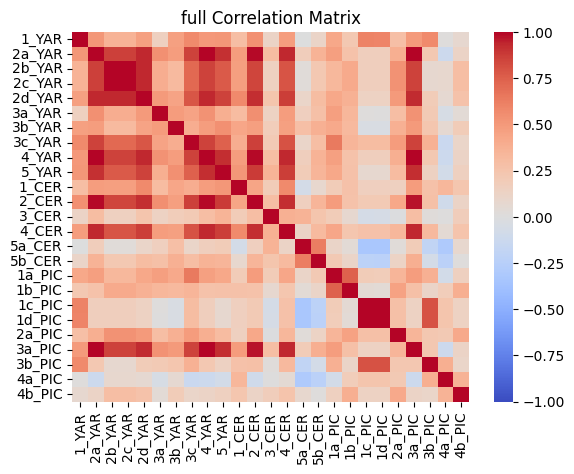

In [12]:
sns.heatmap(df_log.corr(method='spearman'), cmap="coolwarm", vmin=-1, vmax=1)
plt.title("full Correlation Matrix")
plt.show()

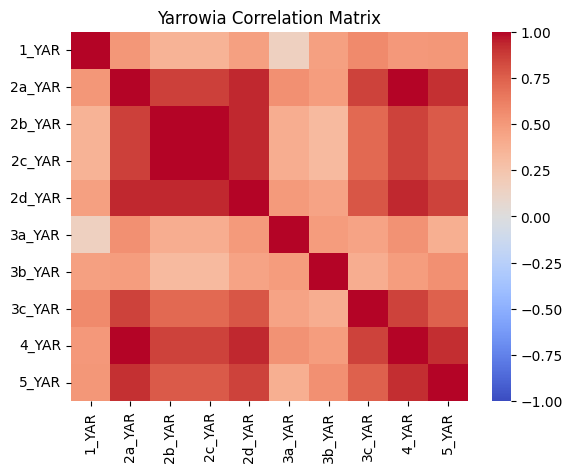

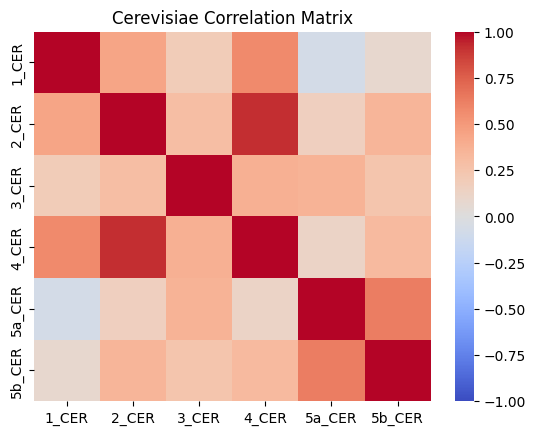

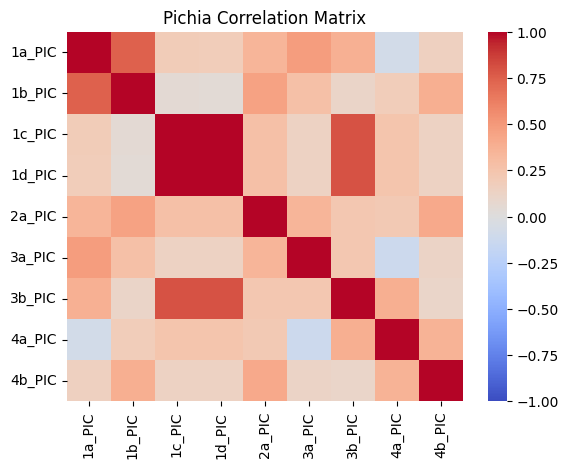

In [13]:
sns.heatmap(yar_df.corr(method='spearman'), cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Yarrowia Correlation Matrix")
plt.show()
sns.heatmap(cer_df.corr(method='spearman'), cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Cerevisiae Correlation Matrix")
plt.show()
sns.heatmap(pic_df.corr(method='spearman'), cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Pichia Correlation Matrix")  
plt.show()

In [14]:
print(yar_df.corr().min().min(), yar_df.corr().max().max())
print(cer_df.corr().min().min(), cer_df.corr().max().max())
print(pic_df.corr().min().min(), pic_df.corr().max().max())

0.19804731703926942 1.0
-0.03887336033331898 1.0
-0.11386582050251125 1.0


In [15]:
print(df_log.max())

1_YAR     1.000000
2a_YAR    1.301030
2b_YAR    1.301030
2c_YAR    1.653213
2d_YAR    1.000000
3a_YAR    1.301030
3b_YAR    1.301030
3c_YAR    1.301030
4_YAR     1.903090
5_YAR     1.602060
1_CER     1.000000
2_CER     1.342423
3_CER     2.000000
4_CER     1.000000
5a_CER    1.397940
5b_CER    1.778151
1a_PIC    1.000000
1b_PIC    1.000000
1c_PIC    1.173186
1d_PIC    0.456366
2a_PIC    1.978637
3a_PIC    1.301030
3b_PIC    2.863323
4a_PIC    1.655138
4b_PIC    1.655138
dtype: float64


In [16]:
df_log_reset = df_log.reset_index() # make compound a column instead of index

df_long = pd.melt(df_log_reset, id_vars='Compound', var_name='Sample', value_name='Log10_Concentration')

print(df_long.head())

                                  Compound Sample  Log10_Concentration
0  Ammonium iron (II) sulphate hexahydrate  1_YAR           -10.000000
1                       Ammonium phosphate  1_YAR           -10.000000
2                        Ammonium sulphate  1_YAR             0.576341
3                                 Arginine  1_YAR           -10.000000
4                            Aspartic acid  1_YAR           -10.000000


In [17]:
# Add an 'Organism' column based on the suffix in 'Sample'
df_long['Organism'] = df_long['Sample'].str.extract(r'_([A-Z]+)$')


In [18]:
filtered_df_long = df_long.replace(-10, np.nan)

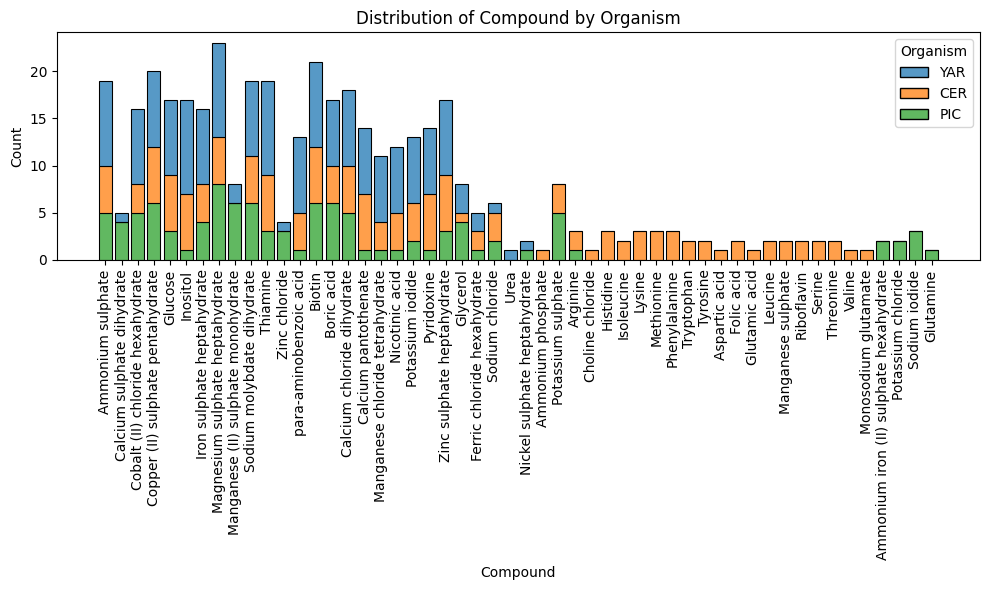

In [ ]:


plt.figure(figsize=(10, 6))
sns.histplot(data=df_long[df_long['Log10_Concentration'] > -10],  # remove pseudocount values
             x='Compound', hue='Organism', 
             multiple='stack',  # you could also try 'dodge'
             shrink=0.8)

plt.xticks(rotation=90)
plt.title("Compound count by Organism")
plt.tight_layout()
plt.show()


In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_long[df_long['Log10_Concentration']> -10],  # remove pseudocount values, 
             x='Compound', hue='Organism', 
             multiple='dodge',  # you could also try 'dodge'
             shrink=0.8)

plt.xticks(rotation=90)
plt.title(" Compound occurence by Organism")
plt.tight_layout()
plt.show()


# normalise to account for difference in number of samples


In [21]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=df_long[df_long['Log10_Concentration'] > -10],  # exclude pseudocount
            x='Compound', y='Log10_Concentration', hue='Organism')
plt.xticks(rotation=90)
plt.title('log10(Concentration) by Compound and Organism')
plt.tight_layout()
plt.show()

In [22]:
plt.figure(figsize=(20, 15))
sns.stripplot(data=df_long[df_long['Log10_Concentration'] > -10],
              x='Compound', y='Log10_Concentration', hue='Organism',
              dodge=True, alpha=0.6, jitter=True)

plt.xticks(rotation=90)
plt.title('log10(Concentration) by Compound and Organism')

Text(0.5, 1.0, 'log10(Concentration) by Compound and Organism')

Everything below is experimental and still needs to be assessed whether they are valid analysis or not.


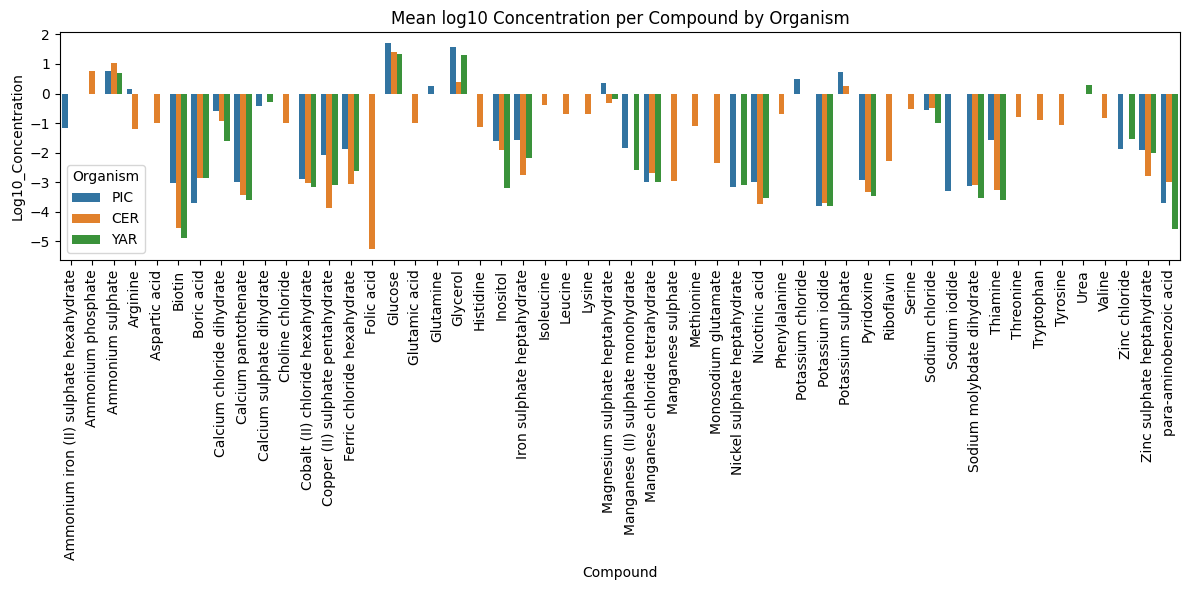

In [23]:
# Take the average log concentration per compound per organism
avg_df = df_long[df_long['Log10_Concentration'] > -10].groupby(['Compound', 'Organism'])['Log10_Concentration'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_df, x='Compound', y='Log10_Concentration', hue='Organism')
plt.xticks(rotation=90)
plt.title("Mean log10 Concentration per Compound by Organism")
plt.tight_layout()
plt.show()

In [ ]:
# this is completely wrong but I like the violoin plot so could be used later
yar_cols = [col for col in df_log.columns if '_YAR' in col]
cer_cols = [col for col in df_log.columns if '_CER' in col]
pic_cols = [col for col in df_log.columns if '_PIC' in col]

# Melt to long format for each organism
yar_long = df_log[yar_cols].copy()
yar_long['Organism'] = 'YAR'
yar_long = yar_long.melt(id_vars='Organism', var_name='Compound', value_name='Value')

cer_long = df_log[cer_cols].copy()
cer_long['Organism'] = 'CER'
cer_long = cer_long.melt(id_vars='Organism', var_name='Compound', value_name='Value')

pic_long = df_log[pic_cols].copy()
pic_long['Organism'] = 'PIC'
pic_long = pic_long.melt(id_vars='Organism', var_name='Compound', value_name='Value')

# Concatenate all long dataframes
df_long = pd.concat([yar_long, cer_long, pic_long], ignore_index=True)

# Optional: clean up compound names if you want, e.g. remove organism suffix:
df_long['Compound'] = df_long['Compound'].str.replace(r'_\w+$', '', regex=True)

# Plot violinplot with seaborn
plt.figure(figsize=(16,6))
sns.violinplot(data=df_long, x='Compound', y='Value', hue='Organism', split=True, inner='quartile')
plt.xticks(rotation=90)
plt.title('Compound Concentrations by Organism (log10 transformed)')
plt.tight_layout()
plt.show()

In [ ]:
df_scaled = pd.

Index(['Ammonium iron (II) sulphate hexahydrate', 'Ammonium phosphate',
       'Ammonium sulphate', 'Arginine', 'Aspartic acid', 'Biotin',
       'Boric acid', 'Calcium chloride dihydrate', 'Calcium pantothenate',
       'Calcium sulphate dihydrate', 'Choline chloride',
       'Cobalt (II) chloride hexahydrate', 'Copper (II) sulphate pentahydrate',
       'Ferric chloride hexahydrate', 'Folic acid', 'Glucose', 'Glutamic acid',
       'Glutamine', 'Glycerol', 'Histidine', 'Inositol',
       'Iron sulphate heptahydrate', 'Isoleucine', 'Leucine', 'Lysine',
       'Magnesium sulphate heptahydrate',
       'Manganese (II) sulphate monohydrate',
       'Manganese chloride tetrahydrate', 'Manganese sulphate', 'Methionine',
       'Monosodium glutamate', 'Nickel sulphate heptahydrate',
       'Nicotinic acid', 'Phenylalanine', 'Potassium chloride',
       'Potassium iodide', 'Potassium sulphate', 'Pyridoxine', 'Riboflavin',
       'Serine', 'Sodium chloride', 'Sodium iodide',
       'Sodium mo

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


df_scaled = pd.DataFrame(scaler.fit_transform(df_log), 
                         columns=df_log.columns,
                         index=df_log.index)



Explained variance ratio: [0.26082911 0.16338031 0.12842846 0.09878819 0.07075282]


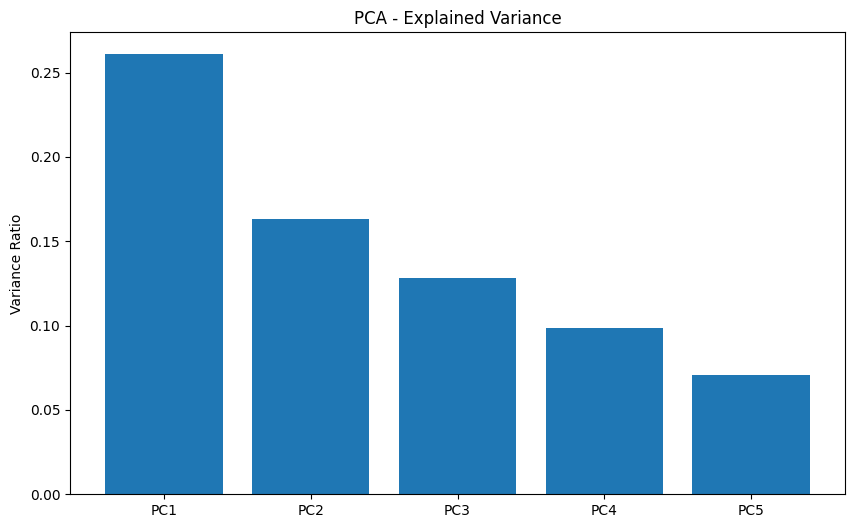

In [34]:
# Transpose to analyze experiments (columns become rows)
pca = PCA(n_components=5)  # Get 5 PCs so you can plot variance later
pca_result = pca.fit_transform(df_scaled.T)

# Scatter plot for first 2 PCs
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title("PCA of Experiments")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Label each experiment (column name)
for i, name in enumerate(df_scaled.columns):
    plt.text(pca_result[i, 0], pca_result[i, 1], str(name), fontsize=8)

plt.tight_layout()
plt.show()

# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Bar plot of variance explained by first 5 PCs
plt.figure(figsize=(10, 6))
plt.bar(range(1, 6), pca.explained_variance_ratio_, tick_label=[f"PC{i}" for i in range(1, 6)])
plt.title("PCA - Explained Variance")
plt.ylabel("Variance Ratio")
plt.show()


(1300, 3)


1_YAR    2a_YAR    2b_YAR  \
Compound                                                                
Ammonium iron (II) sulphate hexahydrate -0.552508 -0.734463 -0.734463   
Ammonium phosphate                      -0.552508 -0.734463 -0.734463   
Ammonium sulphate                        2.369731  2.170756  2.170756   
Arginine                                -0.552508 -0.734463 -0.734463   
Aspartic acid                           -0.552508 -0.734463 -0.734463   

                                           2c_YAR    2d_YAR    3a_YAR  \
Compound                                                                
Ammonium iron (II) sulphate hexahydrate -0.733098 -0.761603 -0.578097   
Ammonium phosphate                      -0.733098 -0.761603 -0.578097   
Ammonium sulphate                        2.159481  2.038009 -0.578097   
Arginine                                -0.733098 -0.761603 -0.578097   
Aspartic acid                           -0.733098 -0.761603 -0.578097   

                                           3b_YAR    3c_YAR    4_YAR  \
Compound                                                               
Ammonium iron (II) sulphate hexahydrate -0.371144 -0.707347 -0.73591   
Ammonium phosphate                      -0.371144 -0.707347 -0.73591   
Ammonium sulphate                        3.326997  2.106626  2.07812   
Arginine                                -0.371144 -0.707347 -0.73591   
Aspartic acid                           -0.371144 -0.707347 -0.73591   

                                            5_YAR  ...    1a_PIC    1b_PIC  \
Compound                                           ...                       
Ammonium iron (II) sulphate hexahydrate -0.647525  ...  1.500110  1.681318   
Ammonium phosphate                      -0.647525  ... -0.651845 -0.541039   
Ammonium sulphate                        2.262071  ...  1.996344  2.193786   
Arginine                                -0.647525  ... -0.651845 -0.541039   
Aspartic acid                           -0.647525  ... -0.651845 -0.541039   

                                           1c_PIC    1d_PIC    2a_PIC  \
Compound                                                                
Ammonium iron (II) sulphate hexahydrate -0.509464 -0.508593 -0.499426   
Ammonium phosphate                      -0.509464 -0.508593 -0.499426   
Ammonium sulphate                       -0.509464 -0.508593  2.691108   
Arginine                                -0.509464 -0.508593 -0.499426   
Aspartic acid                           -0.509464 -0.508593 -0.499426   

                                           3a_PIC   3b_PIC   4a_PIC    4b_PIC  \
Compound                                                                        
Ammonium iron (II) sulphate hexahydrate -0.735751 -0.52712 -0.28741 -0.393569   
Ammonium phosphate                      -0.735751 -0.52712 -0.28741 -0.393569   
Ammonium sulphate                        2.155601 -0.52712 -0.28741  2.448130   
Arginine                                -0.735751 -0.52712 -0.28741  2.433353   
Aspartic acid                           -0.735751 -0.52712 -0.28741 -0.393569   

                                         Cluster  
Compound                                          
Ammonium iron (II) sulphate hexahydrate        0  
Ammonium phosphate                             0  
Ammonium sulphate                              3  
Arginine                                       0  
Aspartic acid                                  0  

[5 rows x 26 columns]

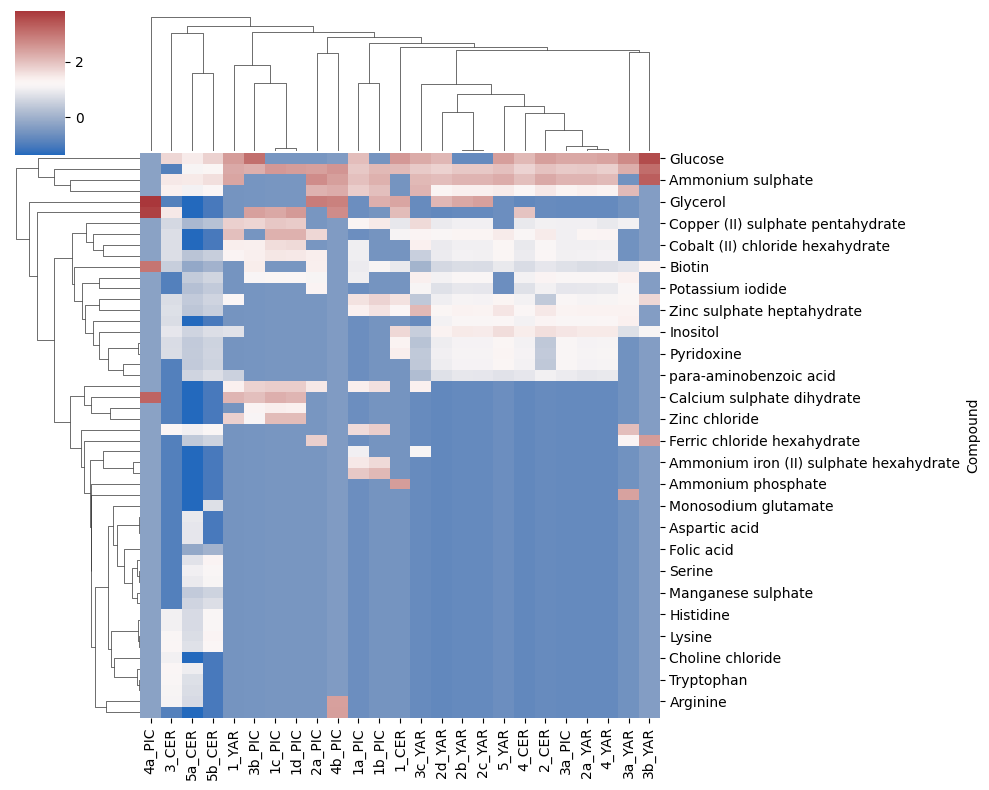

In [38]:
# metric as euclidean 
sns.clustermap(df_scaled, cmap='vlag', metric='euclidean', figsize=(10, 8))

In [39]:
# metric as correlation
sns.clustermap(df_scaled, cmap='vlag', metric='correlation', figsize=(10, 8))

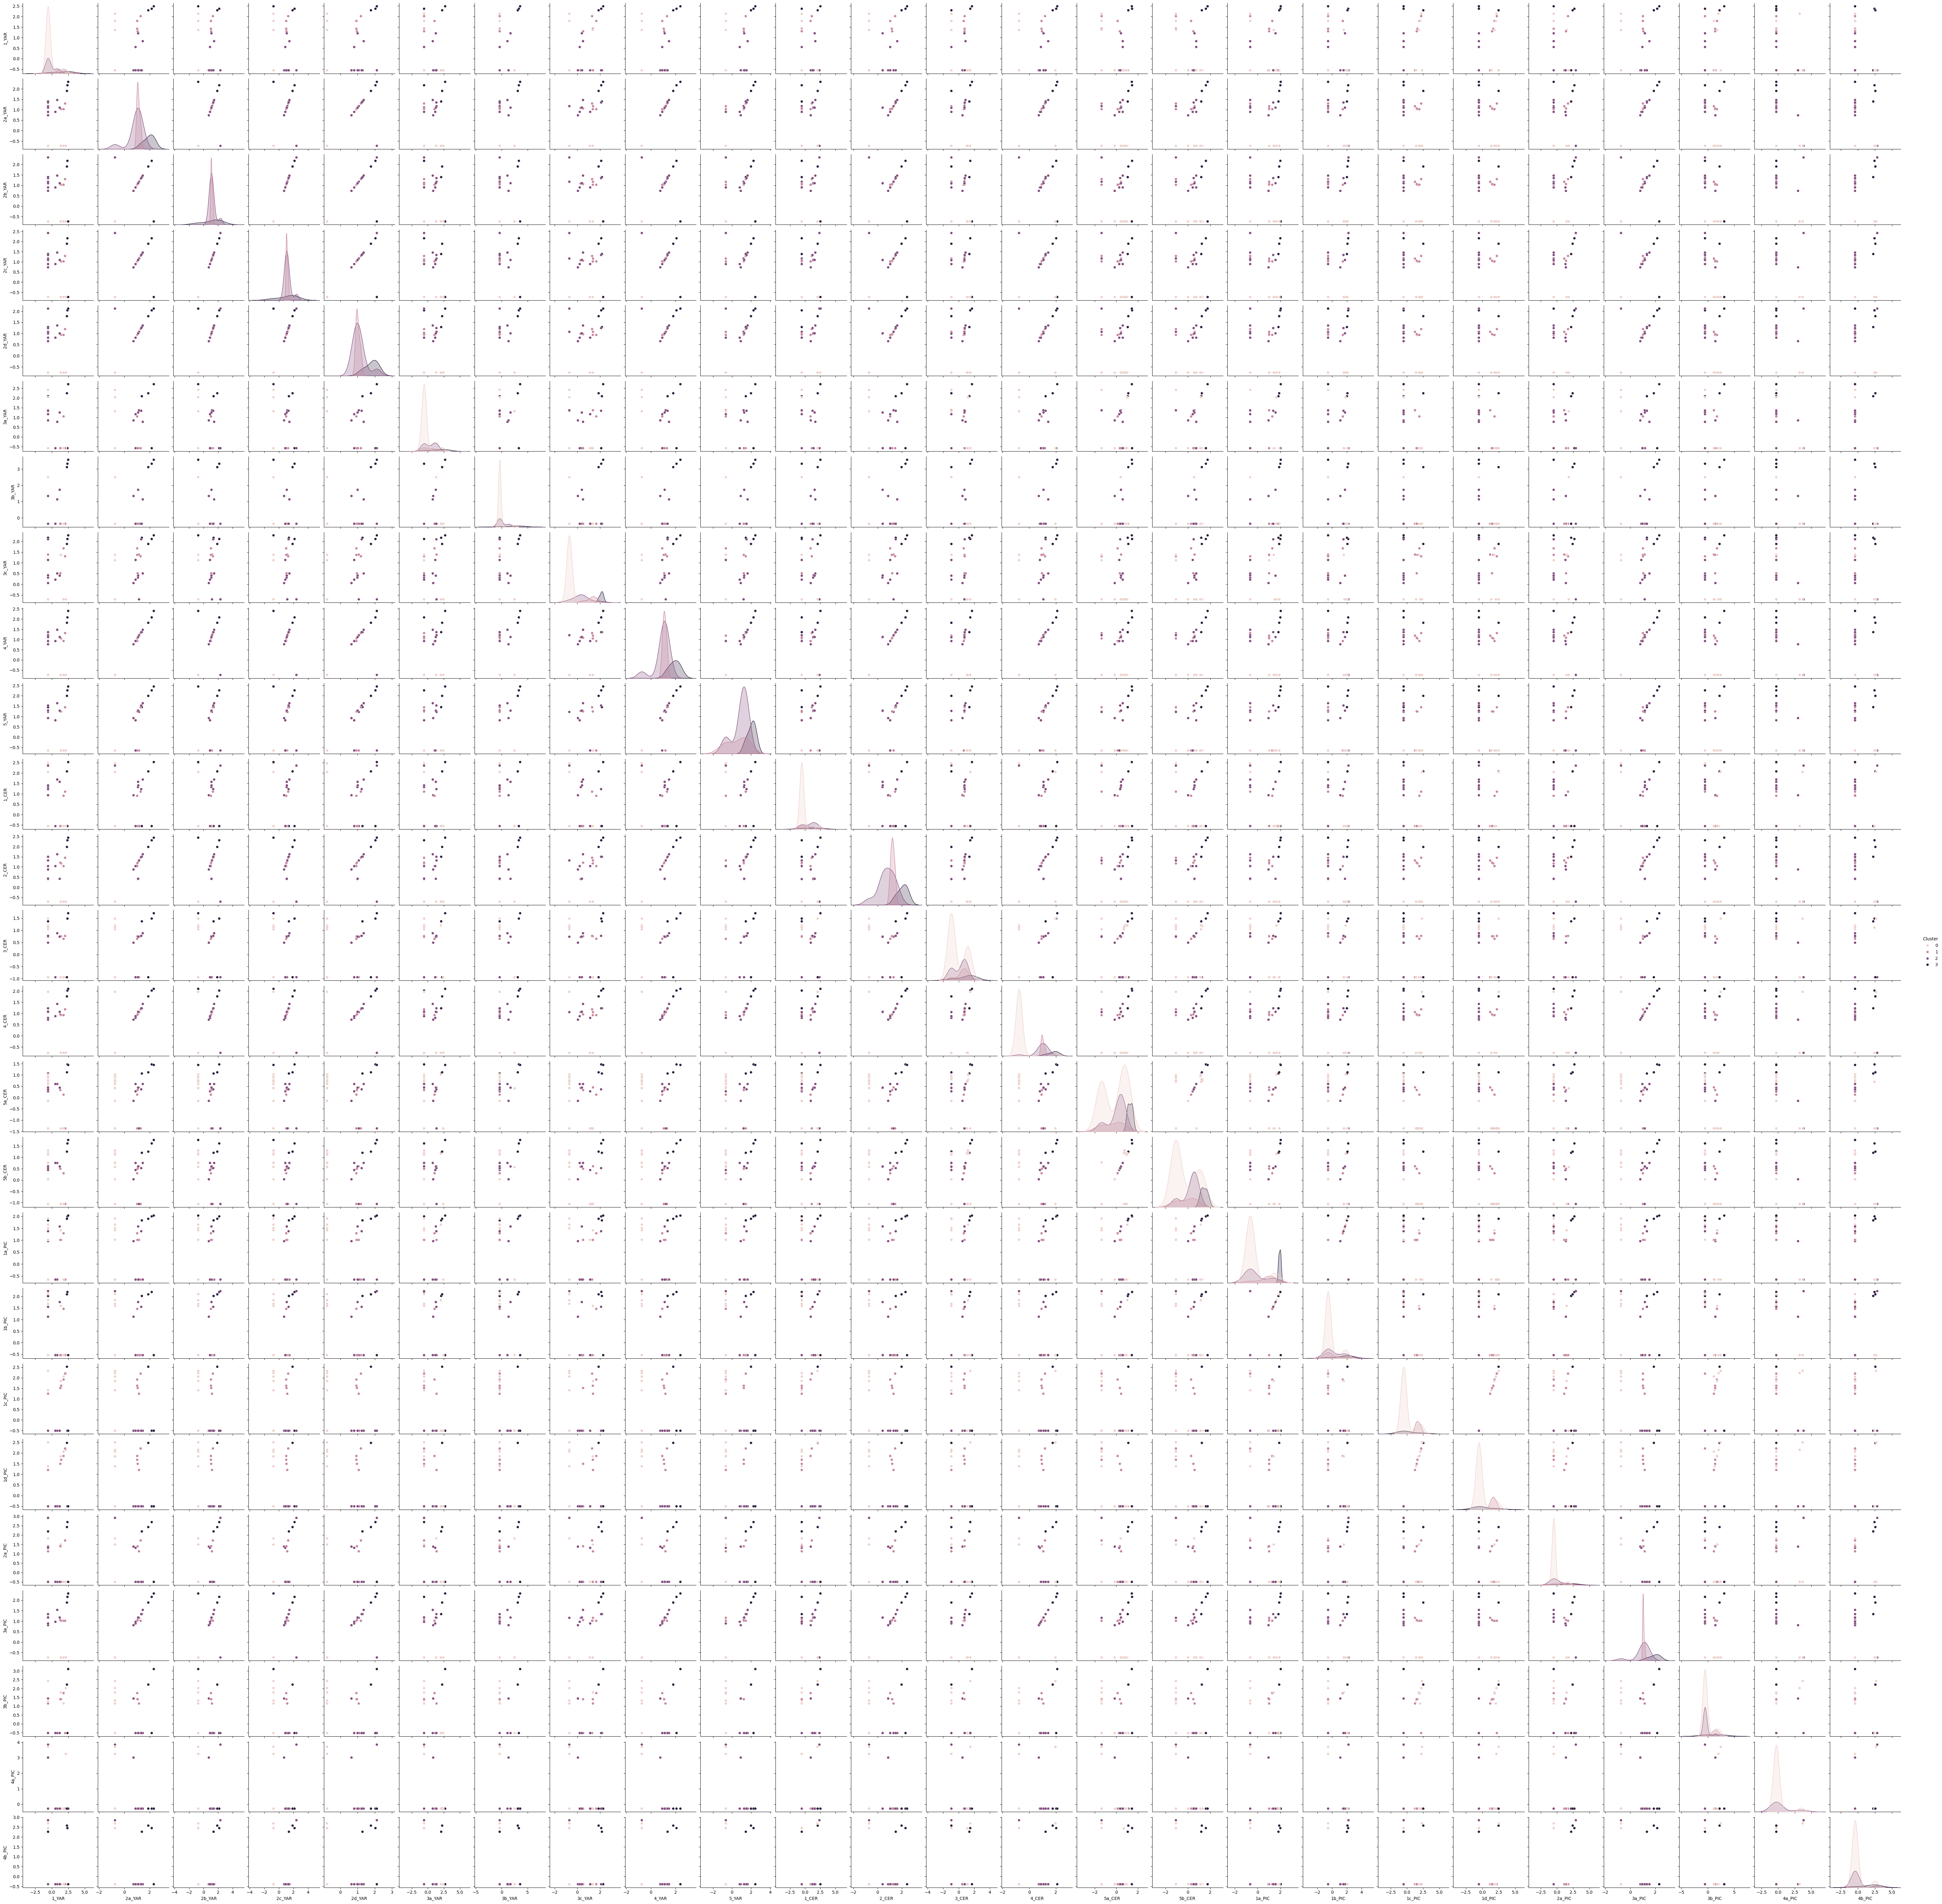

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0)  # Try 3–6
labels = kmeans.fit_predict(df_scaled)

# Add to your dataframe
df_scaled['Cluster'] = labels
import seaborn as sns
sns.pairplot(df_scaled, hue='Cluster')
plt.show()


[Text(1, 0, 'Glucose'),
 Text(1, 1, 'Magnesium sulphate heptahydrate'),
 Text(1, 2, 'Ammonium sulphate'),
 Text(1, 3, 'Calcium chloride dihydrate'),
 Text(1, 4, 'Glycerol'),
 Text(1, 5, 'Potassium sulphate'),
 Text(1, 6, 'Copper (II) sulphate pentahydrate'),
 Text(1, 7, 'Iron sulphate heptahydrate'),
 Text(1, 8, 'Cobalt (II) chloride hexahydrate'),
 Text(1, 9, 'Sodium molybdate dihydrate'),
 Text(1, 10, 'Biotin'),
 Text(1, 11, 'Boric acid'),
 Text(1, 12, 'Potassium iodide'),
 Text(1, 13, 'Thiamine'),
 Text(1, 14, 'Zinc sulphate heptahydrate'),
 Text(1, 15, 'Manganese chloride tetrahydrate'),
 Text(1, 16, 'Inositol'),
 Text(1, 17, 'Calcium pantothenate'),
 Text(1, 18, 'Pyridoxine'),
 Text(1, 19, 'Nicotinic acid'),
 Text(1, 20, 'para-aminobenzoic acid'),
 Text(1, 21, 'Manganese (II) sulphate monohydrate'),
 Text(1, 22, 'Calcium sulphate dihydrate'),
 Text(1, 23, 'Sodium iodide'),
 Text(1, 24, 'Zinc chloride'),
 Text(1, 25, 'Sodium chloride'),
 Text(1, 26, 'Ferric chloride hexahydrate'),


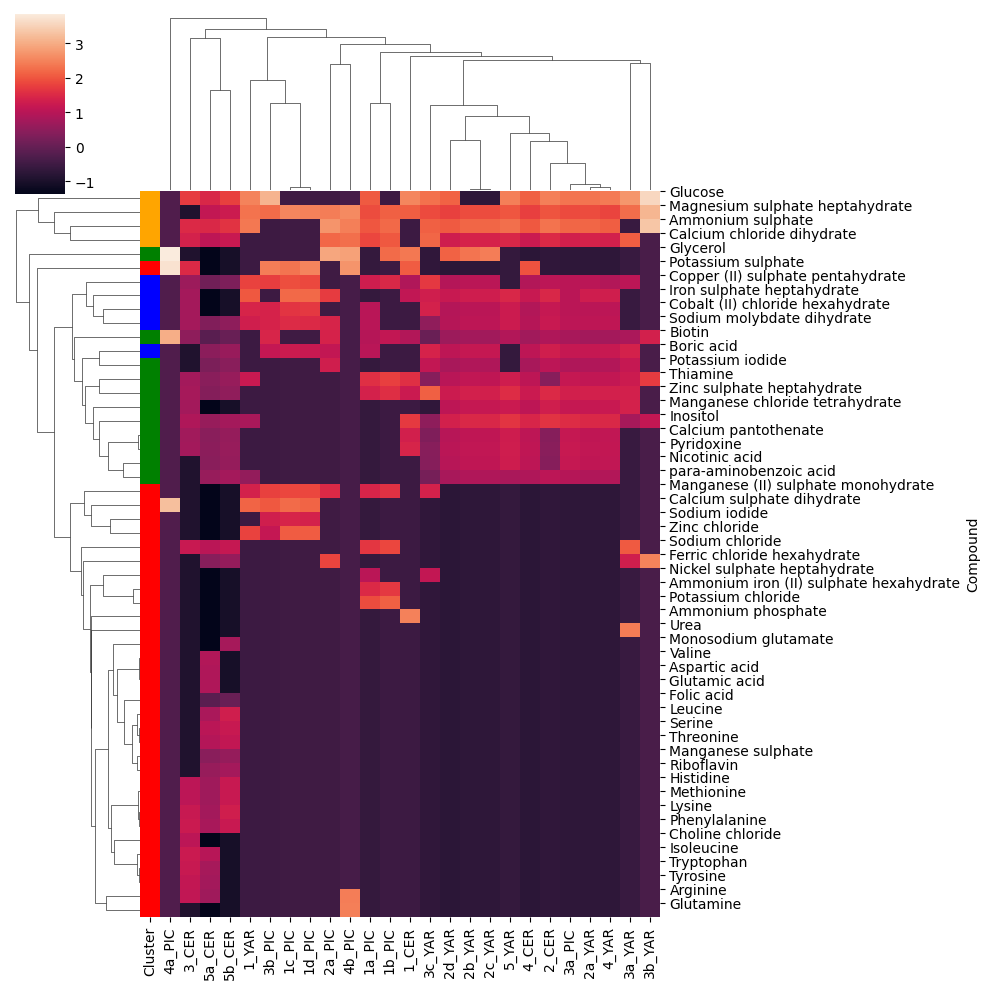

In [42]:
# some adjustments so every compound shows 
g = sns.clustermap(df_scaled.drop('Cluster', axis=1), row_colors=df_scaled['Cluster'].map({0: 'red', 1: 'blue', 2: 'green', 3: 'orange'}))

# weirdly have to reorder label like this to get it to show every compound name from above
reordered_labels = g.data.index[g.dendrogram_row.reordered_ind]

g.ax_heatmap.set_yticks(np.arange(len(reordered_labels)))
g.ax_heatmap.set_yticklabels(reordered_labels, rotation = 0)
#g.fig.set_size_inches(18,20)

In [43]:
df_scaled.groupby('Cluster').mean()

# results below for the whole media set can be interpreted as:
# cluster 0 mostly around -0.1 baseline/weak response
# cluster 1 has some strong positive responses for certain conditions, looking above we can see a few pichia and yarrowia experiments light up in response to glucose
# cluster 2 has some strong positives in different sections to cluster 1, and above we can see there is a response to glycerel
# cluster 3 This seems to do with phosphoric acid from pichia experiments 1c and 1d 

1_YAR    2a_YAR    2b_YAR    2c_YAR    2d_YAR    3a_YAR    3b_YAR  \
Cluster                                                                         
0       -0.335547 -0.734463 -0.734463 -0.733098 -0.761603 -0.343589 -0.281523   
1        1.194370  1.113838  1.113838  1.107161  1.019510  0.136824 -0.371144   
2       -0.166817  0.921696  1.200669  1.202270  1.096024  0.350450  0.110983   
3        1.650159  1.948740  1.181564  1.174592  1.804370  1.613944  2.410913   

           3c_YAR     4_YAR     5_YAR  ...    5b_CER    1a_PIC    1b_PIC  \
Cluster                                ...                                 
0       -0.585512 -0.735910 -0.647525  ... -0.245176 -0.315936 -0.247995   
1        1.244792  1.108454  0.526355  ... -0.145995  0.733246 -0.140286   
2        0.371644  0.942054  0.903004  ...  0.248624 -0.119049  0.261075   
3        2.106081  1.911063  2.038991  ...  1.460188  1.938318  1.441366   

           1c_PIC    1d_PIC    2a_PIC    3a_PIC    3b_PIC    4a_PIC    4b_PIC  
Cluster                                                                        
0       -0.121519 -0.118711 -0.364792 -0.735751 -0.173685 -0.052382 -0.119932  
1        1.699381  1.688795  0.649189  1.049678  1.027309 -0.287410 -0.393569  
2       -0.509464 -0.508593  0.147066  0.963988 -0.349292  0.387536 -0.098883  
3        0.248957  0.237326  1.702422  1.922940  1.065899 -0.287410  1.723343  

[4 rows x 25 columns]

In [44]:
compound_clusters = df_scaled['Cluster']
compound_clusters.value_counts()


Cluster
0    32
2    11
1     5
3     4
Name: count, dtype: int64

In [51]:
compounds_by_cluster = df_scaled.copy()
compounds_by_cluster['Cluster'] = compound_clusters


<Axes: title={'center': 'Mean Response per Condition by Cluster'}>

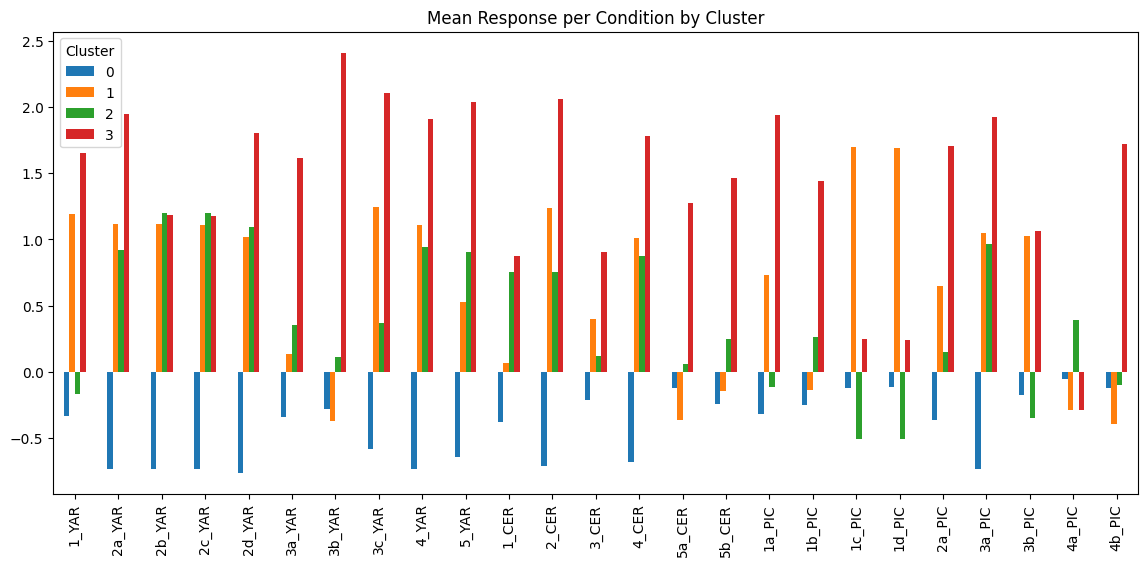

In [52]:
cluster_means = compounds_by_cluster.groupby('Cluster').mean()
cluster_means.T.plot(kind='bar', figsize=(14, 6), title="Mean Response per Condition by Cluster")


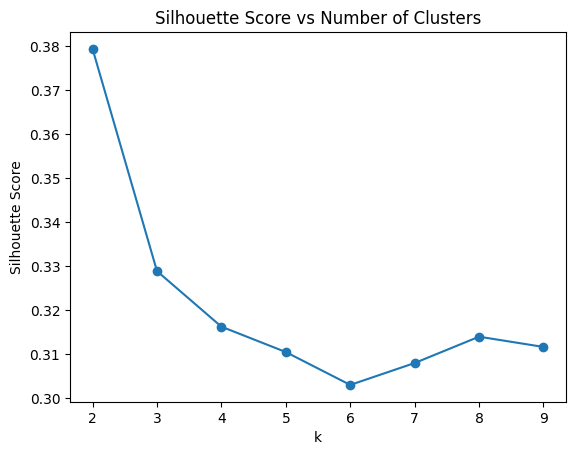

In [47]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(df_scaled.drop('Cluster', axis=1))
    score = silhouette_score(df_scaled.drop('Cluster', axis=1), labels)
    scores.append(score)

plt.plot(range(2, 10), scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()


In [48]:
outliers = df_scaled[df_scaled['Cluster'] != 0]
print(outliers.index)


Index(['Ammonium sulphate', 'Biotin', 'Boric acid',
       'Calcium chloride dihydrate', 'Calcium pantothenate',
       'Cobalt (II) chloride hexahydrate', 'Copper (II) sulphate pentahydrate',
       'Glucose', 'Glycerol', 'Inositol', 'Iron sulphate heptahydrate',
       'Magnesium sulphate heptahydrate', 'Manganese chloride tetrahydrate',
       'Nicotinic acid', 'Potassium iodide', 'Pyridoxine',
       'Sodium molybdate dihydrate', 'Thiamine', 'Zinc sulphate heptahydrate',
       'para-aminobenzoic acid'],
      dtype='object', name='Compound')


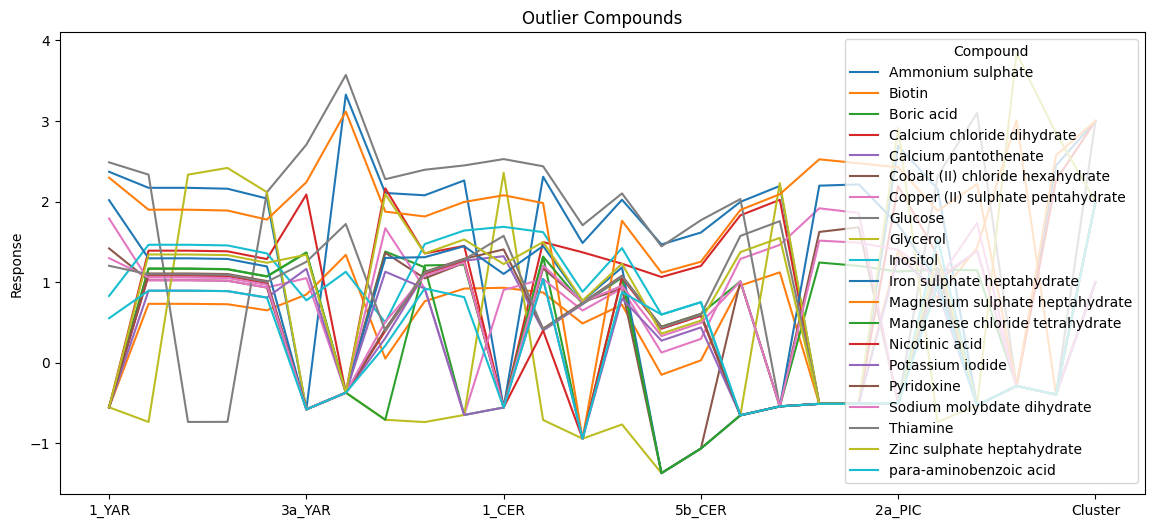

In [50]:
import matplotlib.pyplot as plt

# Plot the outlier compounds
df_scaled.loc[outliers.index].T.plot(figsize=(14, 6), title="Outlier Compounds", legend=True)
plt.ylabel("Response")
plt.show()


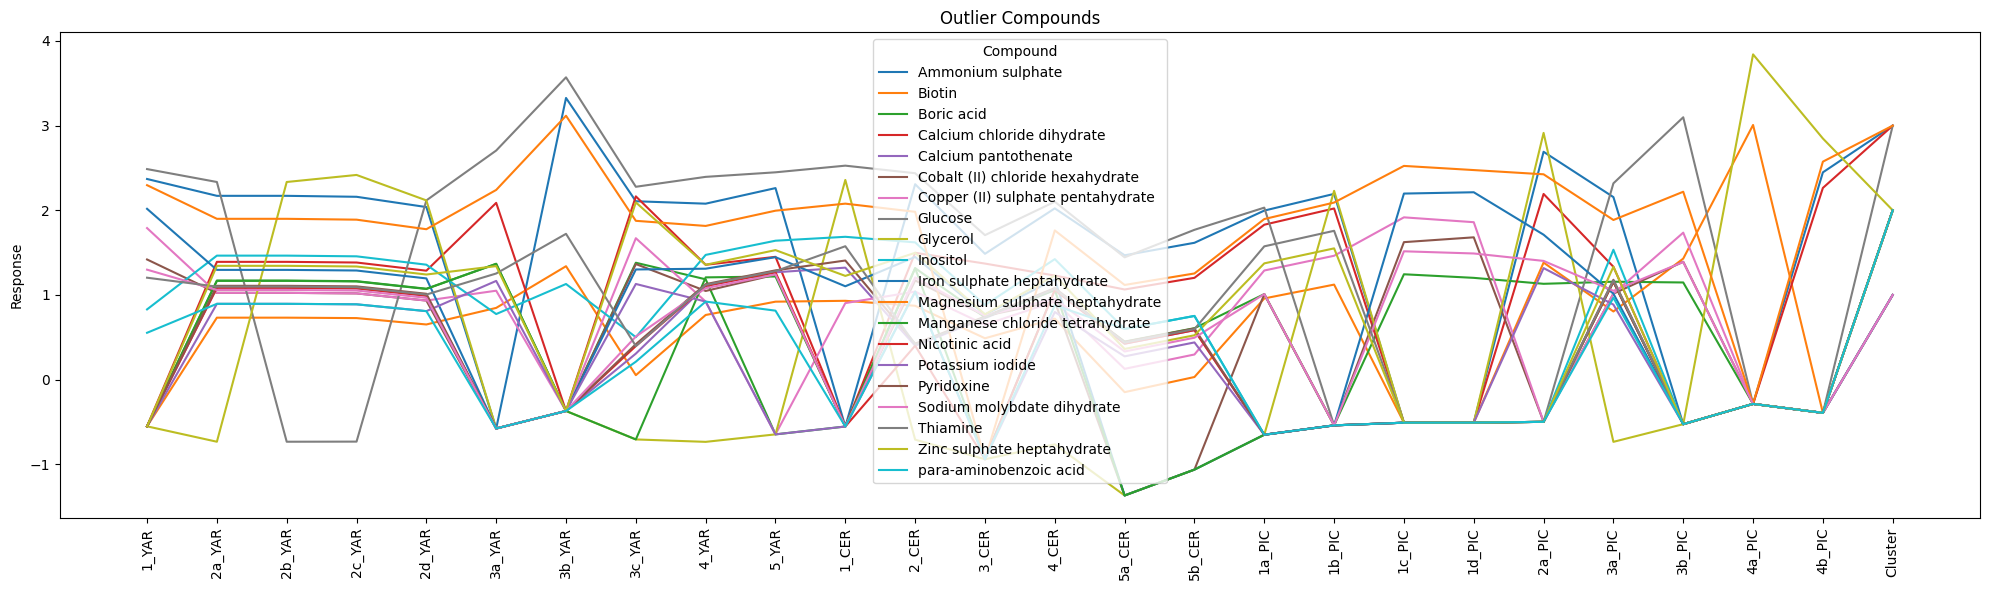

In [53]:
ax = df_scaled.loc[outliers.index].T.plot(figsize=(20, 6), title="Outlier Compounds", legend=True)

# Ensure every point is labeled on the x-axis
ax.set_xticks(range(len(df_scaled.columns)))
ax.set_xticklabels(df_scaled.columns, rotation=90)

plt.ylabel("Response")
plt.tight_layout()
plt.show()


In [54]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_scaled.corr(), cmap='coolwarm', center=0, annot=False)
plt.title("Correlation between Experiments")
plt.show()


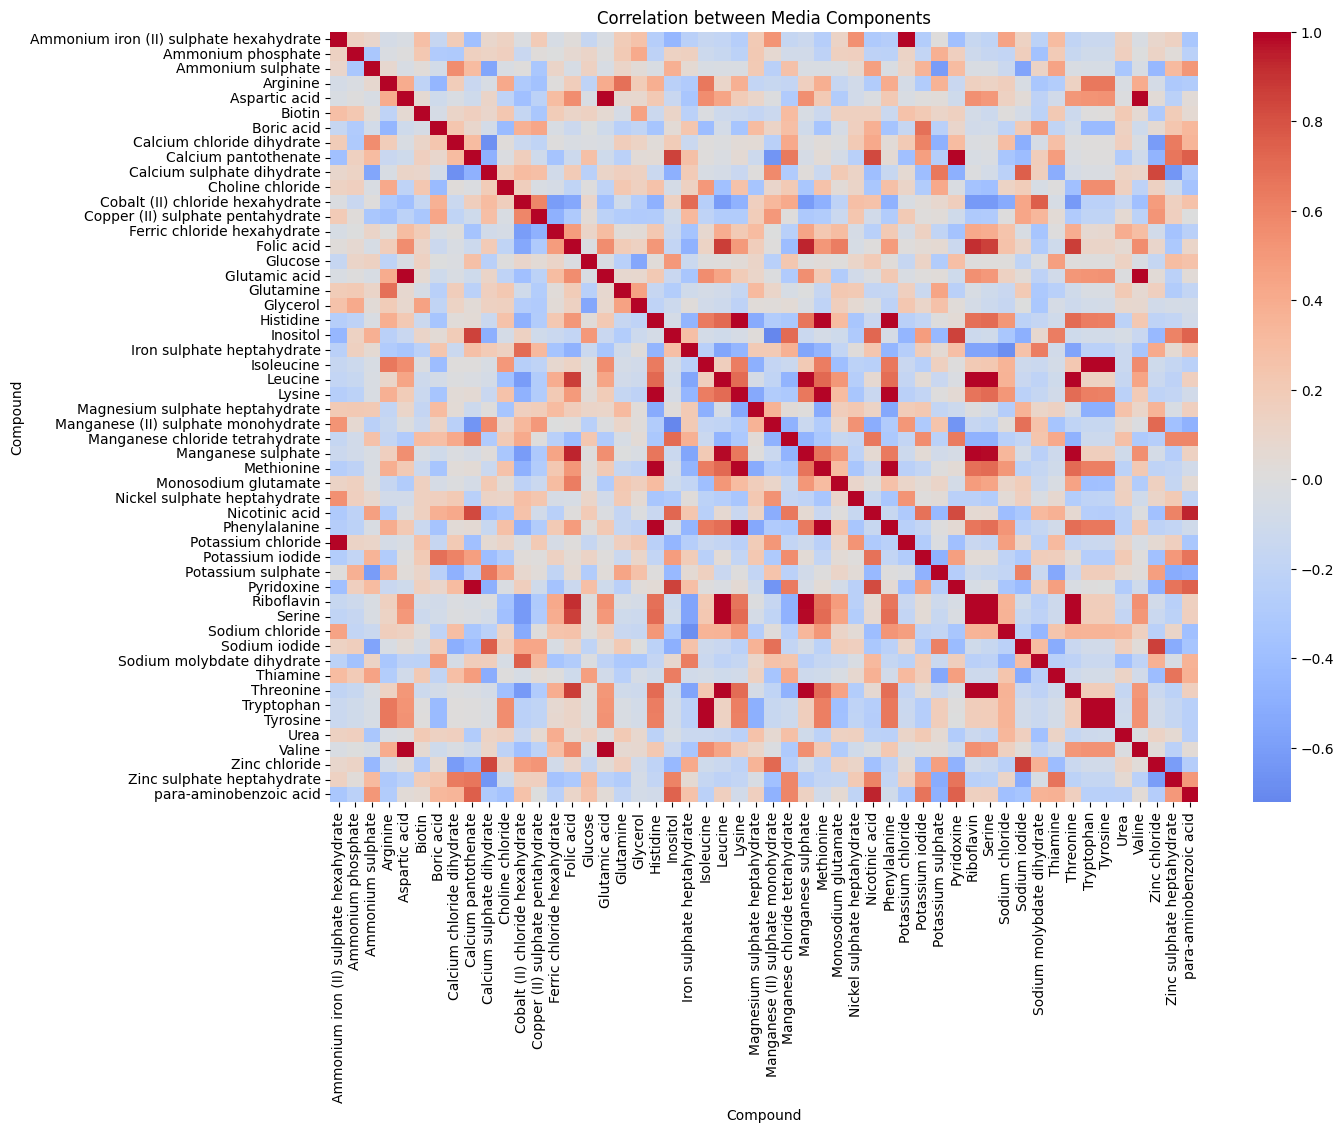

In [ ]:
df_t = df_scaled.T

plt.figure(figsize=(14, 10))
sns.heatmap(df_t.corr(), cmap='coolwarm', center=0, annot=False)
plt.title("Correlation between Media Components")
plt.show()

In [56]:
import numpy as np

ratio_matrix = {}

columns = df_t.columns
for i, col1 in enumerate(columns):
    for j, col2 in enumerate(columns):
        if i < j:
            ratio = df_t[col1] / (df_t[col2] + 1e-8)  # avoid divide-by-zero
            std_ratio = np.std(ratio)
            ratio_matrix[(col1, col2)] = std_ratio

# Find pairs with lowest std dev of ratio
sorted_ratios = sorted(ratio_matrix.items(), key=lambda x: x[1])
for (comp1, comp2), std in sorted_ratios[:10]:  # show top 10 stable ratios
    print(f"{comp1} / {comp2} --> std dev of ratio: {std:.4f}")


Calcium pantothenate / Pyridoxine --> std dev of ratio: 0.0514
Aspartic acid / Valine --> std dev of ratio: 0.1922
Glutamic acid / Valine --> std dev of ratio: 0.1922
Histidine / Methionine --> std dev of ratio: 0.1922
Aspartic acid / Glutamic acid --> std dev of ratio: 0.1923
Histidine / Lysine --> std dev of ratio: 0.1925
Tryptophan / Tyrosine --> std dev of ratio: 0.1932
Lysine / Phenylalanine --> std dev of ratio: 0.1933
Histidine / Phenylalanine --> std dev of ratio: 0.1933
Methionine / Phenylalanine --> std dev of ratio: 0.1934


In [57]:
# this yields same results whether scaled or not
import itertools

ratios = {}
cols = df_t.columns  # Now each column is a media component

for col1, col2 in itertools.combinations(cols, 2):
    ratio = df_t[col1] / df_t[col2]
    
    # Optional: skip if too many NaNs or Infs
    if ratio.isnull().mean() > 0.2 or np.isinf(ratio).mean() > 0.2:
        continue
    '''
    if ratio.isnull().all():  # avoid divide-by-zero columns
        continue
    '''
    std_dev = ratio.std(skipna=True)
    ratios[(col1, col2)] = std_dev

stable_ratios = sorted(ratios.items(), key=lambda x: x[1])
for (comp1, comp2), std in stable_ratios[:10]:
    print(f"{comp1} / {comp2} --> std dev: {std:.4f}")



Aspartic acid / Glutamic acid --> std dev: 0.0000
Aspartic acid / Valine --> std dev: 0.0096
Ammonium iron (II) sulphate hexahydrate / Potassium chloride --> std dev: 0.0573
Aspartic acid / Isoleucine --> std dev: 0.3546
Aspartic acid / Tryptophan --> std dev: 0.3619
Aspartic acid / Leucine --> std dev: 0.3647
Aspartic acid / Tyrosine --> std dev: 0.3694
Aspartic acid / Serine --> std dev: 0.3793
Aspartic acid / Threonine --> std dev: 0.3896
Aspartic acid / Glutamine --> std dev: 0.3932


c:\Users\uqkmuroi\gitcode\ML_for_rational_design\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [58]:
#this is a template to create a heatmap of ratio similarity. It still needs to be adjusted to be useful as many 0 values exists and the labels don't indicate every compound
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to square matrix
ratio_df = pd.DataFrame(index=cols, columns=cols, dtype=float)
for (col1, col2), std in ratios.items():
    ratio_df.loc[col1, col2] = std
    ratio_df.loc[col2, col1] = std  # symmetric

plt.figure(figsize=(10, 8))
sns.heatmap(ratio_df, cmap="viridis", annot=False)
plt.title("Standard Deviation of Component Ratios Across Experiments")
plt.show()


Below are extras I generated from chatGPT. Generally to try and fix or improve things above

In [59]:
# for making mean = 0; std = 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_t_scaled = pd.DataFrame(scaler.fit_transform(df_t), 
                           index=df_t.index, 
                           columns=df_t.columns)


In [60]:
# for bringing everything to [0,1]
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_t_scaled = pd.DataFrame(scaler.fit_transform(df_t), 
                           index=df_t.index, 
                           columns=df_t.columns)


In [61]:
import itertools
import numpy as np

ratios = {}
cols = df_t_scaled.columns

for col1, col2 in itertools.combinations(cols, 2):
    with np.errstate(divide='ignore', invalid='ignore'):
        ratio = df_t_scaled[col1] / df_t_scaled[col2]
        if ratio.isnull().all() or np.isinf(ratio).all():
            continue
        std_dev = ratio.replace([np.inf, -np.inf], np.nan).dropna().std()
        ratios[(col1, col2)] = std_dev

stable_ratios = sorted(ratios.items(), key=lambda x: x[1])


In [62]:
for (comp1, comp2), std in stable_ratios[:10]:
    print(f"{comp1} / {comp2} --> std dev: {std:.4f}")


Aspartic acid / Glutamic acid --> std dev: 0.0000
Histidine / Methionine --> std dev: 0.0014
Aspartic acid / Valine --> std dev: 0.0045
Glutamic acid / Valine --> std dev: 0.0045
Tryptophan / Tyrosine --> std dev: 0.0051
Serine / Threonine --> std dev: 0.0091
Lysine / Phenylalanine --> std dev: 0.0120
Lysine / Methionine --> std dev: 0.0180
Histidine / Lysine --> std dev: 0.0199
Leucine / Threonine --> std dev: 0.0208


In [63]:
df_filtered = df_t_scaled.loc[:, (df_t_scaled != 0).any()]


In [ ]:
ratio = df_t_scaled[col1] / df_t_scaled[col2]
valid = ratio.replace([np.inf, -np.inf], np.nan).dropna()
if len(valid) >= 5:  # Only trust stable ratios with enough data points
    std_dev = valid.std()


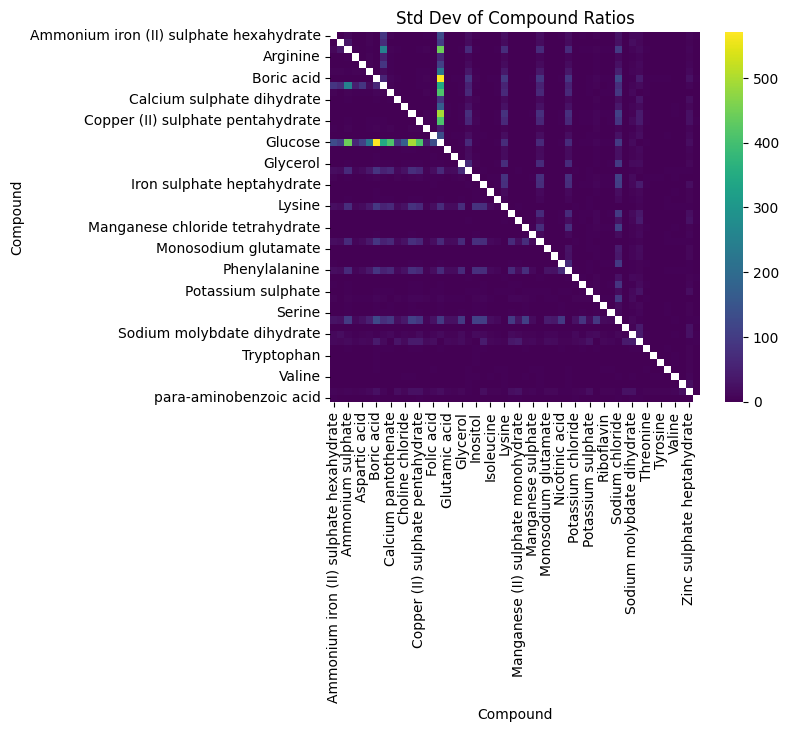

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

ratio_df = pd.DataFrame(index=cols, columns=cols, dtype=float)
for (col1, col2), std in ratios.items():
    ratio_df.loc[col1, col2] = std
    ratio_df.loc[col2, col1] = std  # fill symmetry

sns.heatmap(ratio_df, cmap="viridis", square=True)
plt.title("Std Dev of Compound Ratios")
plt.show()


In [65]:
compound_names = df_t_scaled.columns
n = len(compound_names)

# Initialize matrix
std_matrix = pd.DataFrame(np.nan, index=compound_names, columns=compound_names)

# Fill it
for i in range(n):
    for j in range(i+1, n):
        c1, c2 = compound_names[i], compound_names[j]
        ratio = df_t_scaled[c1] / df_t_scaled[c2]
        ratio = ratio.replace([np.inf, -np.inf], np.nan).dropna()
        if len(ratio) >= 5:
            std = ratio.std()
            std_matrix.loc[c1, c2] = std
            std_matrix.loc[c2, c1] = std  # symmetry


In [66]:
from sklearn.metrics import pairwise_distances

# Replace NaNs with high values (i.e., very dissimilar)
distance_matrix = std_matrix.fillna(std_matrix.max().max())
# Clip very large outliers if needed
distance_matrix = np.clip(distance_matrix, 0, 10)


In [67]:
from sklearn.cluster import AgglomerativeClustering

# You can adjust number of clusters or set a distance threshold
clustering = AgglomerativeClustering(
    metric='precomputed',
    linkage='average',
    distance_threshold=1.0,  # try tuning this
    n_clusters=None
)

labels = clustering.fit_predict(distance_matrix)

# Assign clusters to compounds
compound_clusters = pd.DataFrame({'Compound': compound_names, 'Cluster': labels})


In [68]:
# View clusters
for cluster_id, group in compound_clusters.groupby("Cluster"):
    print(f"Cluster {cluster_id}:")
    print(group["Compound"].tolist())
    print()

Cluster 0:
['Arginine', 'Choline chloride', 'Ferric chloride hexahydrate', 'Folic acid', 'Isoleucine', 'Leucine', 'Manganese sulphate', 'Riboflavin', 'Serine', 'Threonine', 'Tryptophan', 'Tyrosine']

Cluster 1:
['Biotin', 'Calcium sulphate dihydrate', 'Manganese (II) sulphate monohydrate', 'Nickel sulphate heptahydrate', 'Sodium iodide', 'Zinc chloride']

Cluster 2:
['Ammonium iron (II) sulphate hexahydrate', 'Ammonium phosphate', 'Aspartic acid', 'Glutamic acid', 'Glutamine', 'Glycerol', 'Iron sulphate heptahydrate', 'Magnesium sulphate heptahydrate', 'Monosodium glutamate', 'Potassium chloride', 'Valine']

Cluster 3:
['Calcium pantothenate', 'Pyridoxine']

Cluster 4:
['Nicotinic acid', 'para-aminobenzoic acid']

Cluster 5:
['Potassium iodide']

Cluster 6:
['Histidine', 'Lysine', 'Methionine', 'Phenylalanine', 'Sodium chloride']

Cluster 7:
['Zinc sulphate heptahydrate']

Cluster 8:
['Inositol']

Cluster 9:
['Urea']

Cluster 10:
['Thiamine']

Cluster 11:
['Calcium chloride dihydrate']

In [69]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns


In [70]:
from scipy.spatial.distance import squareform

# Replace NaNs with large values if not done already
distance_matrix_clean = distance_matrix.fillna(distance_matrix.max().max())
# Force diagonal to 0
np.fill_diagonal(distance_matrix_clean.values, 0)
# Condense
condensed_dist = squareform(distance_matrix_clean.values)


In [71]:
linked = linkage(condensed_dist, method='average')

plt.figure(figsize=(12, 6))
dendrogram(linked, labels=distance_matrix_clean.index.tolist(), leaf_rotation=90)
plt.title("Hierarchical Clustering of Compounds")
plt.xlabel("Compound")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()
